In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [33]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']    
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


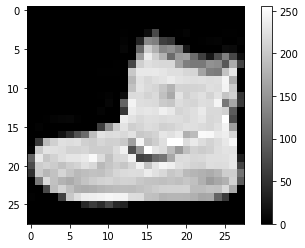

In [34]:
plt.figure()
plt.imshow(train_images[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [39]:
train_images = tf.keras.utils.normalize(train_images, axis=1)
test_images = tf.keras.utils.normalize(test_images, axis=1)

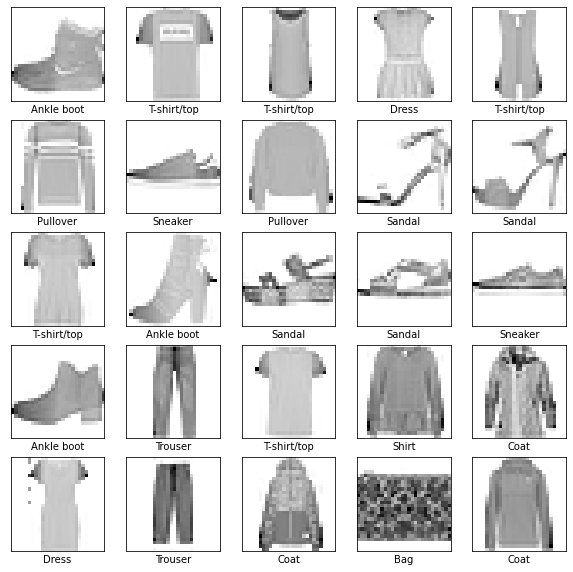

In [40]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # diff between actual and probabilities
              metrics=['accuracy'])

In [43]:
model.fit(train_images, train_labels, epochs=20) # less epochs means UF , more epochs means OF


Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5077 - accuracy: 0.8187
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3735 - accuracy: 0.8643
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3361 - accuracy: 0.8775
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3099 - accuracy: 0.8860
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2897 - accuracy: 0.8932
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2764 - accuracy: 0.8973
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2620 - accuracy: 0.9017
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2496 - accuracy: 0.9069
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2413 - accuracy: 0.9098
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.231

In [44]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3574 - accuracy: 0.8867
Test accuracy: 0.8866999745368958


In [45]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[1.1462719e-08 7.9027471e-21 3.8843576e-10 1.1976562e-12 1.2910322e-15
 6.1836154e-03 1.5058481e-10 3.9509069e-03 4.8226292e-07 9.8986501e-01]
9
9


In [46]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [57]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

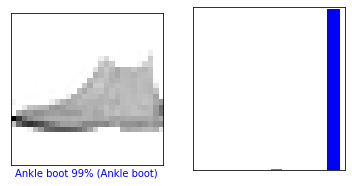

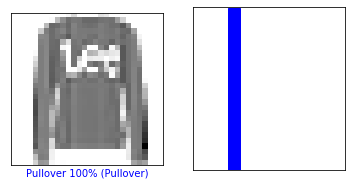

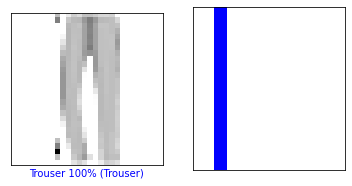

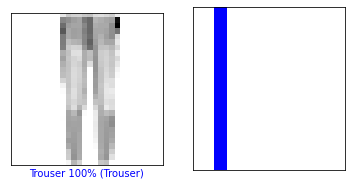

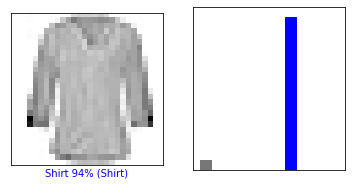

In [60]:
for i in range(5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions,  test_labels)
    plt.show()

In [61]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

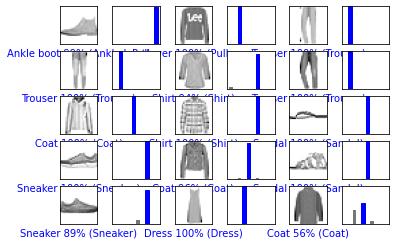

In [62]:
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()